3. Usando el algoritmo de Metrópolis, realice el muestreo de N = 1000 eventos de una distribución normal: $$A - N(x; \mu = 2; \lambda = 0:5)$$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def Metropolis(x0, Normal, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Normal(x[i-1],mu,sigma)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Normal(xf,mu,sigma)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[100:,:]

In [4]:
def normal(x,mu,sigma):
  c=1/np.sqrt(2*np.pi*sigma**2)
  return np.exp(-0.5*((x-mu)/sigma)**2)*c

100%|██████████| 9999/9999 [00:00<00:00, 11904.01it/s]


(array([0.0058098 , 0.00435735, 0.        , 0.        , 0.01016715,
        0.01888185, 0.029049  , 0.04793085, 0.0610029 , 0.06245535,
        0.10457639, 0.14234009, 0.21205769, 0.25272628, 0.25998853,
        0.38925657, 0.42411537, 0.49383297, 0.63907796, 0.63181571,
        0.6492451 , 0.7596313 , 0.78432295, 0.80610969, 0.80465724,
        0.768346  , 0.76398865, 0.63472061, 0.65650735, 0.63762551,
        0.61002896, 0.47204622, 0.42992517, 0.37037472, 0.30646693,
        0.31953898, 0.18300869, 0.15831704, 0.10748129, 0.09586169,
        0.08569454, 0.07988474, 0.0319539 , 0.0261441 , 0.0203343 ,
        0.0116196 , 0.00726225, 0.0058098 , 0.        , 0.0029049 ]),
 array([0.30605889, 0.37560353, 0.44514817, 0.5146928 , 0.58423744,
        0.65378208, 0.72332671, 0.79287135, 0.86241599, 0.93196063,
        1.00150526, 1.0710499 , 1.14059454, 1.21013917, 1.27968381,
        1.34922845, 1.41877309, 1.48831772, 1.55786236, 1.627407  ,
        1.69695163, 1.76649627, 1.83604091, 1.

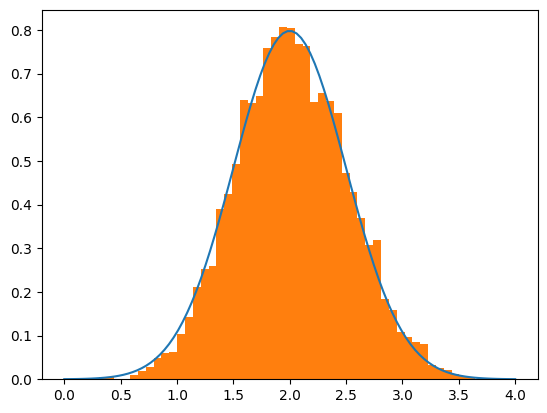

In [5]:
mu=2
sigma=0.5
x_=np.linspace(0,4,100)

plt.plot(x_,normal(x_,2,0.5))
x0=np.array([1.])
MCMC = Metropolis(x0,normal)

plt.hist(MCMC,density=True,bins=50)